# **Reading a CSV File using Pandas**

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('C:/Users/sjose/Downloads/diabetes.csv')

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Finding missing values in dataset**
https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

**Standard Missing Values**

In [30]:
df['Pregnancies']

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

In [31]:
df['Pregnancies'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Pregnancies, Length: 768, dtype: bool

**Non-Standard Missing Values**

In [32]:
# Making a list of missing value types
missing_values = ["n/a", "na", "--"]
df = pd.read_csv("C:/Users/sjose/Downloads/diabetes.csv", na_values = missing_values)

In [33]:
print(df['Glucose'])
print(df['Glucose'].isnull())

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Glucose, Length: 768, dtype: bool


**Unexpected Missing Values**

In [34]:
cnt=0
for row in df['Insulin']:
    try:
        int(row)
        pass
    except ValueError:
        df.loc[cnt, 'Insulin']=np.nan
    cnt+=1

In [35]:
print(df['Insulin'])

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64


**Total missing values for each feature**

In [36]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Any missing values?**

In [37]:
print(df.isnull().values.any())

False


**Total number of missing values**

In [38]:
print(df.isnull().sum().sum())

0


# **Dealing with Missing Data**

**Filling in missing values with a single value**

In [39]:
# Replace missing values with a number
df['Age'].fillna(0,inplace=True)

**Location based replacement**

In [40]:
df.loc[2,'Age']

32

In [41]:
df.loc[2,'Age'] = 21

In [42]:
df.loc[2,'Age']

21

**Replace using median**

In [43]:
median = df['Age'].median()
median

29.0

In [44]:
df['Age'].fillna(median, inplace=True)

# **Calculating Correlation betwwen Attributes**
https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

**Syntax of dataframe.corr()**

**Syntax:** DataFrame.corr(self, method=’pearson’, min_periods=1) 

**Parameters:** 

**method :** 
* pearson: standard correlation coefficient 
* kendall: Kendall Tau correlation coefficient 
* spearman: Spearman rank correlation

**min_periods :** Minimum number of observations required per pair of columns to have a valid result. Currently only available for pearson and spearman correlation 

**Returns:** count :y : DataFrame

In [45]:
df.corr(method='pearson')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.542459,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.260963,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239682,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.112322,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.041290,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.037560,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.032802,0.173844
Age,0.542459,0.260963,0.239682,-0.112322,-0.041290,0.037560,0.032802,1.000000,0.236526
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.236526,1.000000


# **Heatmap for the data**
https://www.geeksforgeeks.org/ml-matrix-plots-in-seaborn/

Heatmap is a way to show some sort of matrix plot. To use a heatmap the data should be in a matrix form. By matrix we mean that the index name and the column name must match in some way so that the data that we fill inside the cells are relevant.

<AxesSubplot:>

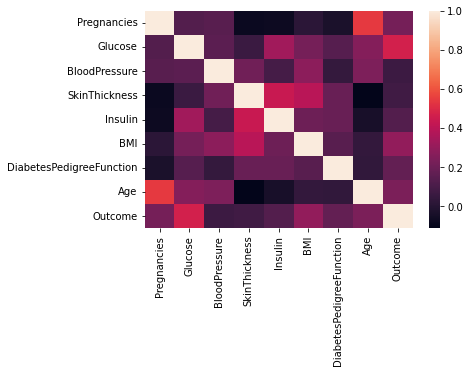

In [46]:
import seaborn as sns
sns.heatmap(df.corr(method='pearson'))

**Attributes in Heatmap()**

* annot is used to annotate the actual value that belongs to these cells
* cmap is used for the colour mapping you want like coolwarm, plasma, magma etc.
* linecolor is used to set the colour of the lines separating the cells.
* linewidth is used to set the width of the lines separating the cells.


<AxesSubplot:>

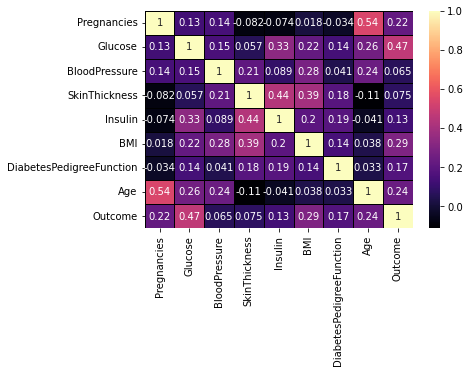

In [47]:
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='magma', linecolor='black', linewidth=1)

<AxesSubplot:>

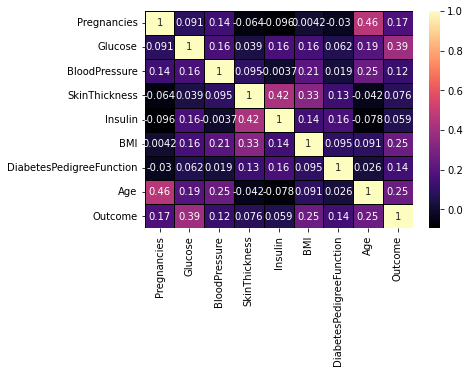

In [48]:
sns.heatmap(df.corr(method='kendall'), annot=True, cmap='magma', linecolor='black', linewidth=1)

<AxesSubplot:>

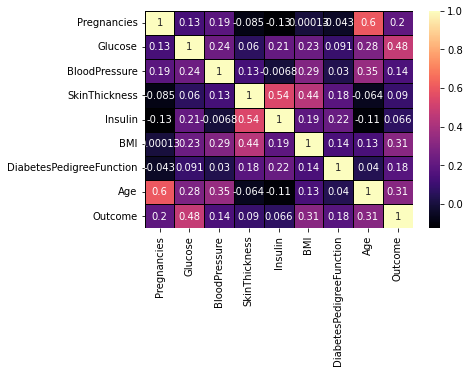

In [49]:
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='magma', linecolor='black', linewidth=1)

# **Plotting Visual Map for the given Dataset**

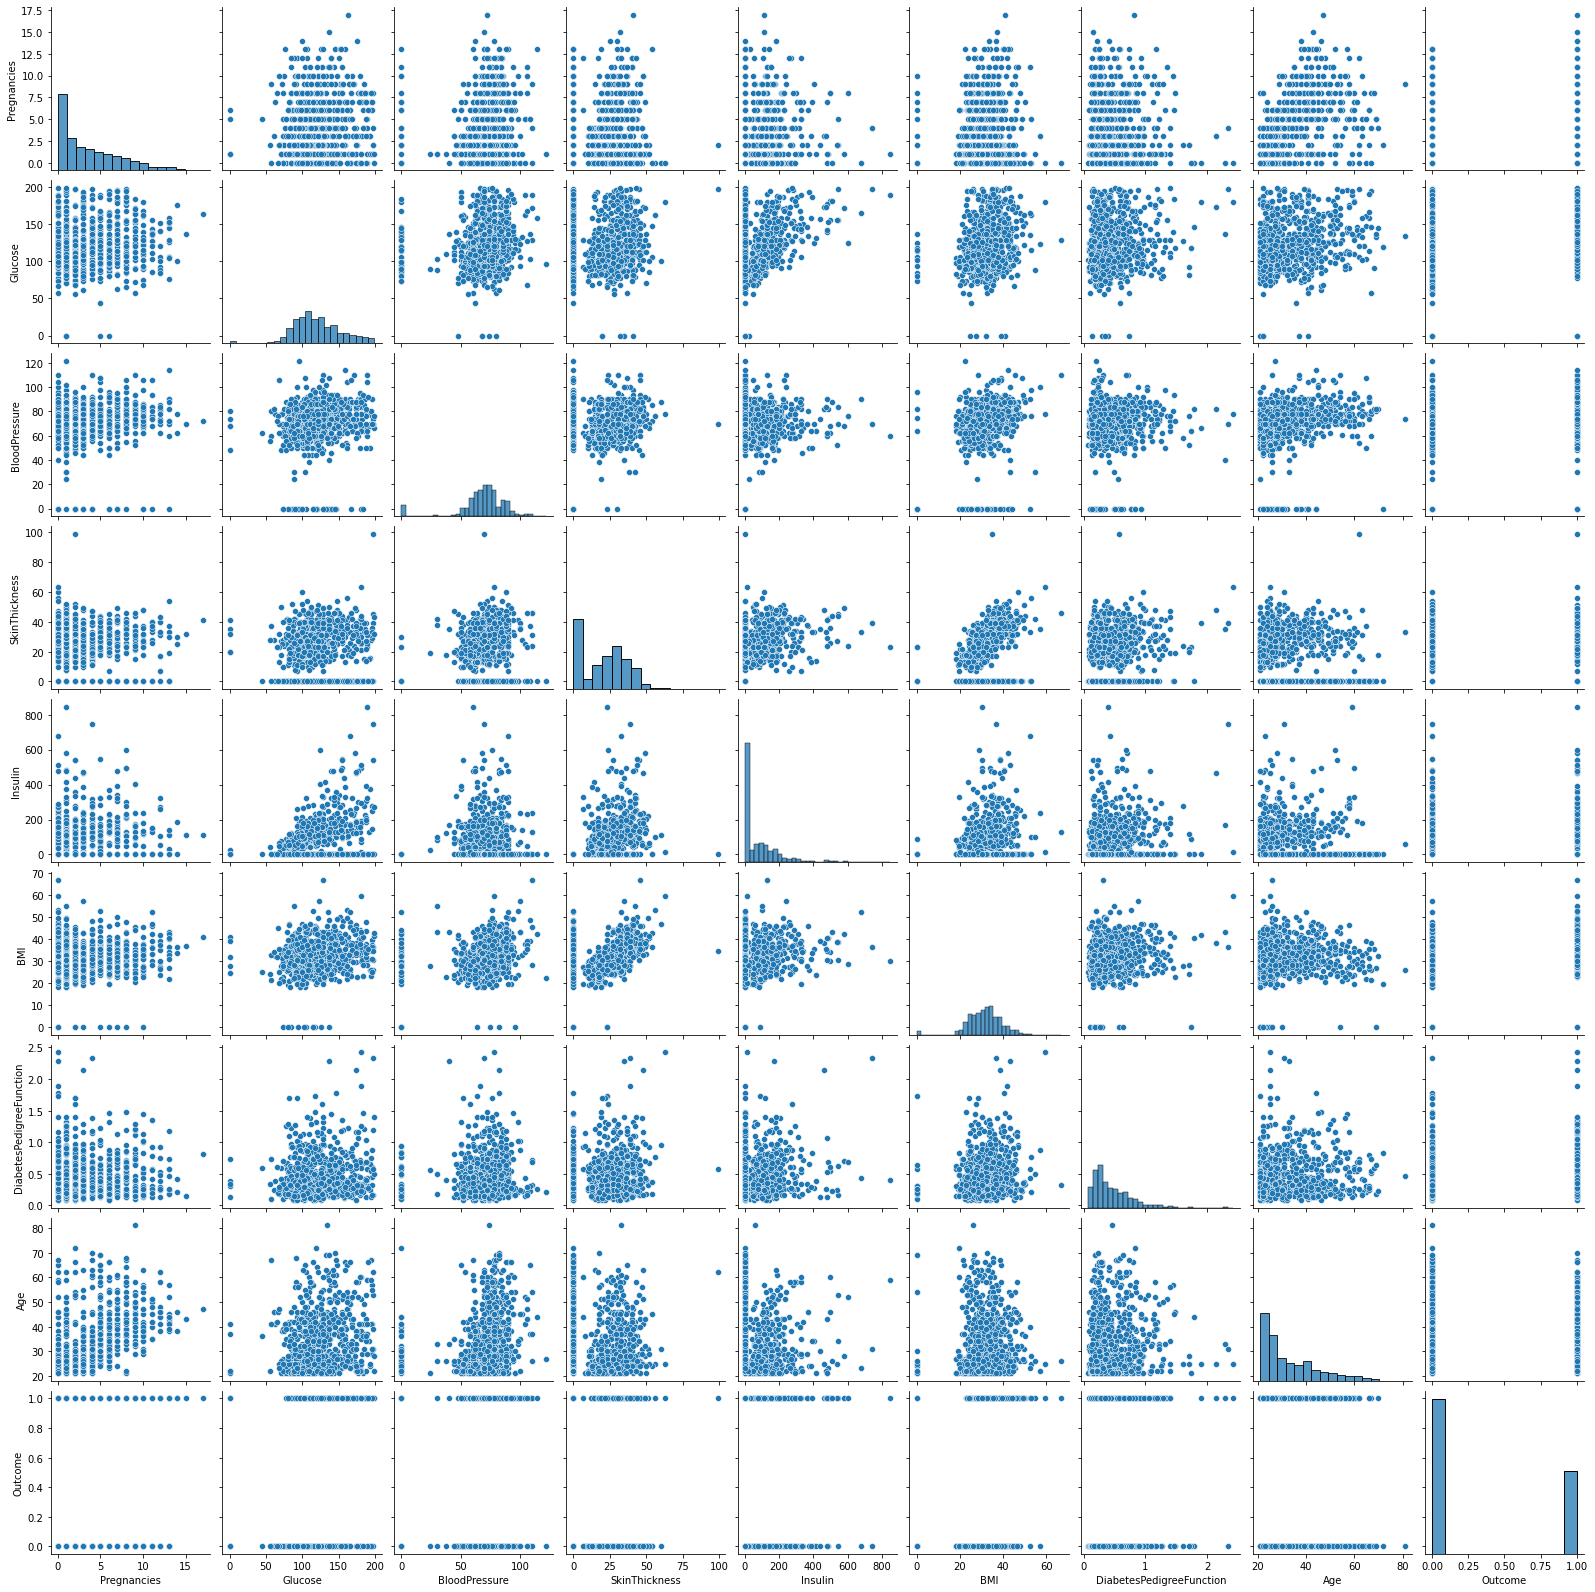

In [50]:
sns.pairplot(df)

random forest
logistic regression
SVM
MLP
decision tree
naive bayes classifier

MSE
Confusion Matrix
accuracy
